<a href="https://colab.research.google.com/github/GarettGazay/ai_projects/blob/master/RBSeq2Seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1320]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import time

In [1321]:
rides = pd.read_csv('/content/ordering_dataset.csv')

In [1322]:
rides = rides.drop(['Unnamed: 0','order','rider.first_name','rider.last_name','pickup.event_location.address1','dropoff.event_location.address1'], axis=1)

In [1323]:
rides.head()

,space_type,billable_distance,run_name,rider.mediroutes_rider_id,pickup.event_location.zip,pickup.event_location.longitude,pickup.event_location.latitude,dropoff.event_location.zip,dropoff.event_location.longitude,dropoff.event_location.latitude,pickup_month,pickup_day,pickup_hour,pickup_minute,dropoff_hour,dropoff_minute
0,1.000000,0.012314,0.181818,0.184127,0.508772,-0.996364,0.992340,0.857143,-0.990424,0.848616,1.0,1.0,0.095238,0.517241,0.000000,0.818182
1,1.000000,0.006394,0.181818,0.198413,0.350877,-0.996461,0.989864,0.825397,-0.990674,0.847189,1.0,1.0,0.142857,0.517241,0.105263,0.000000
2,1.000000,0.003826,0.181818,0.182540,0.824561,-0.996339,0.990125,0.825397,-0.990674,0.847189,1.0,1.0,0.142857,0.517241,0.105263,0.000000
3,0.333333,0.023389,0.136364,0.220635,0.771930,-0.996058,0.990114,0.682540,-0.989395,0.845235,1.0,1.0,0.238095,0.206897,0.210526,0.000000
4,0.333333,0.018819,0.136364,0.092063,0.719298,-0.995385,0.991005,0.746032,-0.989807,0.845745,1.0,1.0,0.285714,0.517241,0.263158,0.545455


In [1324]:
rides = rides.astype('float32')

In [1325]:
rides.dtypes

space_type                          float32
billable_distance                   float32
run_name                            float32
rider.mediroutes_rider_id           float32
pickup.event_location.zip           float32
pickup.event_location.longitude     float32
pickup.event_location.latitude      float32
dropoff.event_location.zip          float32
dropoff.event_location.longitude    float32
dropoff.event_location.latitude     float32
pickup_month                        float32
pickup_day                          float32
pickup_hour                         float32
pickup_minute                       float32
dropoff_hour                        float32
dropoff_minute                      float32
dtype: object

In [1326]:
rides.head()

,space_type,billable_distance,run_name,rider.mediroutes_rider_id,pickup.event_location.zip,pickup.event_location.longitude,pickup.event_location.latitude,dropoff.event_location.zip,dropoff.event_location.longitude,dropoff.event_location.latitude,pickup_month,pickup_day,pickup_hour,pickup_minute,dropoff_hour,dropoff_minute
0,1.000000,0.012314,0.181818,0.184127,0.508772,-0.996364,0.992340,0.857143,-0.990424,0.848616,1.0,1.0,0.095238,0.517241,0.000000,0.818182
1,1.000000,0.006394,0.181818,0.198413,0.350877,-0.996461,0.989864,0.825397,-0.990674,0.847189,1.0,1.0,0.142857,0.517241,0.105263,0.000000
2,1.000000,0.003826,0.181818,0.182540,0.824561,-0.996339,0.990125,0.825397,-0.990674,0.847189,1.0,1.0,0.142857,0.517241,0.105263,0.000000
3,0.333333,0.023389,0.136364,0.220635,0.771930,-0.996058,0.990114,0.682540,-0.989395,0.845235,1.0,1.0,0.238095,0.206897,0.210526,0.000000
4,0.333333,0.018819,0.136364,0.092063,0.719298,-0.995385,0.991005,0.746032,-0.989807,0.845745,1.0,1.0,0.285714,0.517241,0.263158,0.545455


In [1327]:
rides['pickup_day'] = rides['pickup_day'].astype(int)
rides['pickup_month'] = rides['pickup_month'].astype(int)

rides['pickup_day'] = rides['pickup_day'].astype(str)
rides['pickup_month'] = rides['pickup_month'].astype(str)

rides['id'] = rides['pickup_month'] + rides['pickup_day']

rides = rides.drop(['pickup_month','pickup_day'], axis=1)

In [1328]:
rides.head()

,space_type,billable_distance,run_name,rider.mediroutes_rider_id,pickup.event_location.zip,pickup.event_location.longitude,pickup.event_location.latitude,dropoff.event_location.zip,dropoff.event_location.longitude,dropoff.event_location.latitude,pickup_hour,pickup_minute,dropoff_hour,dropoff_minute,id
0,1.000000,0.012314,0.181818,0.184127,0.508772,-0.996364,0.992340,0.857143,-0.990424,0.848616,0.095238,0.517241,0.000000,0.818182,11
1,1.000000,0.006394,0.181818,0.198413,0.350877,-0.996461,0.989864,0.825397,-0.990674,0.847189,0.142857,0.517241,0.105263,0.000000,11
2,1.000000,0.003826,0.181818,0.182540,0.824561,-0.996339,0.990125,0.825397,-0.990674,0.847189,0.142857,0.517241,0.105263,0.000000,11
3,0.333333,0.023389,0.136364,0.220635,0.771930,-0.996058,0.990114,0.682540,-0.989395,0.845235,0.238095,0.206897,0.210526,0.000000,11
4,0.333333,0.018819,0.136364,0.092063,0.719298,-0.995385,0.991005,0.746032,-0.989807,0.845745,0.285714,0.517241,0.263158,0.545455,11


In [1329]:
rides.shape

(16315, 15)

In [1330]:
rides = rides.astype(str)

In [1331]:
rides.values[2].astype('float32')

array([ 1.      ,  0.003826,  0.181818,  0.18254 ,  0.824561, -0.996339,
        0.990125,  0.825397, -0.990674,  0.847189,  0.142857,  0.517241,
        0.105263,  0.      , 11.      ], dtype=float32)

Put rides into buckets by date

In [1332]:
# Group the rows by the 'id' column
grouped = rides.groupby('id')

# Create a list to store the grouped arrays
day_buckets = []

# Loop through each group
for name, group in grouped:
    # Convert the group to a numpy array
    group_array = group.values.astype(np.float32)
    
    # Append the group array to the list of grouped arrays
    day_buckets.append(group_array)

# Set the display format of the numpy arrays
np.set_printoptions(precision=6, suppress=True)

# Sort the list of grouped arrays by the first column of each array
day_buckets.sort(key=lambda x: x[0][14])


In [1333]:
# Do this or when you shuffle below it will shuffle both for some fucking reason, and copy doesn't work.
day_buckets_y = [x.astype(str) for x in day_buckets]

In [1334]:
day_buckets_y[0][0]

array(['1.0', '0.0123136155', '0.18181819', '0.18412699', '0.50877196',
       '-0.99636376', '0.99233985', '0.85714287', '-0.9904242',
       '0.8486156', '0.0952381', '0.51724136', '0.0', '0.8181818', '11.0'],
      dtype='<U32')

In [1335]:
def shuffle_np_array(np_array_list):
    for i in range(len(np_array_list)):
        np.random.shuffle(np_array_list[i])
    return np_array_list

day_buckets_X = shuffle_np_array(day_buckets)[:-1] # create a shuffled version for X below

Below each 'word' is represented by a vector in the sentence we are trying to predict the order of.

In [1336]:
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define the number of features in each ride vector
num_features = 15

# Define the maximum length of the sequences
max_length = 15

X = []
y = []
# Convert the input data into a 3D array of shape (num_samples, max_length, num_features)
for i in day_buckets_X:
  X.append(pad_sequences(i, maxlen=max_length, dtype='float32', padding='post'))
for i in day_buckets_y:
  y.append(pad_sequences(i, maxlen=max_length, dtype='float32', padding='post'))

In [1337]:
X[0][0]

array([ 0.333333,  0.017141,  0.227273,  0.12381 ,  0.877193, -0.995685,
        0.992237,  0.825397, -0.990674,  0.847189,  0.52381 ,  0.086207,
        0.473684,  0.909091, 11.      ], dtype=float32)

In [1338]:
y[0]

array([[ 1.      ,  0.012314,  0.181818,  0.184127,  0.508772, -0.996364,
         0.99234 ,  0.857143, -0.990424,  0.848616,  0.095238,  0.517241,
         0.      ,  0.818182, 11.      ],
       [ 1.      ,  0.006394,  0.181818,  0.198413,  0.350877, -0.996461,
         0.989864,  0.825397, -0.990674,  0.847189,  0.142857,  0.517241,
         0.105263,  0.      , 11.      ],
       [ 1.      ,  0.003826,  0.181818,  0.18254 ,  0.824561, -0.996339,
         0.990125,  0.825397, -0.990674,  0.847189,  0.142857,  0.517241,
         0.105263,  0.      , 11.      ],
       [ 0.333333,  0.023389,  0.136364,  0.220635,  0.77193 , -0.996058,
         0.990114,  0.68254 , -0.989395,  0.845235,  0.238095,  0.206897,
         0.210526,  0.      , 11.      ],
       [ 0.333333,  0.018819,  0.136364,  0.092063,  0.719298, -0.995385,
         0.991005,  0.746032, -0.989807,  0.845745,  0.285714,  0.517241,
         0.263158,  0.545455, 11.      ],
       [ 1.      ,  0.007237,  0.363636,  0.077778

In [1339]:
input = []
target = []
for array in X:
    new_array = np.delete(array, -1, axis=1)
    input.append(new_array)

count = 0
for array in y:
    new_array = np.delete(array, -1, axis=1)
    target.append(new_array)


In [1340]:
input[0]

array([[ 0.333333,  0.017141,  0.227273,  0.12381 ,  0.877193, -0.995685,
         0.992237,  0.825397, -0.990674,  0.847189,  0.52381 ,  0.086207,
         0.473684,  0.909091],
       [ 1.      ,  0.003826,  0.181818,  0.18254 ,  0.824561, -0.996339,
         0.990125,  0.825397, -0.990674,  0.847189,  0.142857,  0.517241,
         0.105263,  0.      ],
       [ 1.      ,  0.014415,  0.227273,  0.133333,  0.614035, -0.995456,
         0.991803,  0.825397, -0.990674,  0.847189,  0.52381 ,  0.206897,
         0.473684,  1.      ],
       [ 0.333333,  0.023389,  0.136364,  0.220635,  0.77193 , -0.996058,
         0.990114,  0.68254 , -0.989395,  0.845235,  0.238095,  0.206897,
         0.210526,  0.      ],
       [ 1.      ,  0.012314,  0.181818,  0.184127,  0.508772, -0.996364,
         0.99234 ,  0.857143, -0.990424,  0.848616,  0.095238,  0.517241,
         0.      ,  0.818182],
       [ 1.      ,  0.005842,  0.863636,  0.185714,  0.701754, -0.995342,
         0.990551,  0.809524, -

In [1341]:
input[0].shape

(10, 14)

In [1342]:
target[0].shape

(10, 14)

In [1343]:
len(input[0])

10

In [1344]:
len(target[0])

10

In [1345]:
# Define the input and output shape
input_shape = (10, 14)
output_shape = (10, 14)

# input = np.random.rand(*input_shape)
# target = np.random.rand(*output_shape)


In [1346]:
input = input[0]
target = target[0]

In [1347]:
# input = input.reshape(1, *input.shape)
# target = target.reshape(1, *target.shape)

# # Define the encoder
# encoder_inputs = keras.layers.Input(shape=input_shape)
# encoder = keras.layers.LSTM(64, return_state=True)
# encoder_outputs, state_h, state_c = encoder(encoder_inputs)
# encoder_states = [state_h, state_c]

# # Define the decoder
# decoder_inputs = keras.layers.Input(shape=(None, 14))
# decoder_lstm = keras.layers.LSTM(64, return_sequences=True, return_state=True)
# decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
# decoder_dense = keras.layers.Dense(14, activation='linear')
# decoder_outputs = decoder_dense(decoder_outputs)

# # Define the model
# model = keras.models.Model([encoder_inputs, decoder_inputs], decoder_outputs)
# model.compile(optimizer='adam', loss='mean_squared_error')


# # Train the model
# history = model.fit([input, target], target, epochs=200, batch_size=16)

input = input.reshape(1, *input.shape)
target = target.reshape(1, *target.shape)

# Define the encoder
encoder_inputs = keras.layers.Input(shape=input_shape)
encoder = keras.layers.LSTM(64, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
encoder_states = [state_h, state_c]

# Define the decoder
decoder_inputs = keras.layers.Input(shape=(None, 14))
decoder_lstm = keras.layers.LSTM(64, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)

# Add the attention mechanism
attention = keras.layers.Attention()([decoder_outputs, encoder_outputs])
decoder_outputs = keras.layers.Concatenate()([decoder_outputs, attention])

decoder_dense = keras.layers.Dense(14, activation='linear')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = keras.models.Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='mean_squared_error')

# Train the model
history = model.fit([input, target], target, epochs=25, batch_size=16)


Epoch 1/25
1/1 [==============================] - 2s 2s/step - loss: 0.5736
Epoch 2/25
1/1 [==============================] - 0s 10ms/step - loss: 0.5645
Epoch 3/25
1/1 [==============================] - 0s 11ms/step - loss: 0.5556
Epoch 4/25
1/1 [==============================] - 0s 9ms/step - loss: 0.5468
Epoch 5/25
1/1 [==============================] - 0s 13ms/step - loss: 0.5381
Epoch 6/25
1/1 [==============================] - 0s 12ms/step - loss: 0.5295
Epoch 7/25
1/1 [==============================] - 0s 9ms/step - loss: 0.5210
Epoch 8/25
1/1 [==============================] - 0s 10ms/step - loss: 0.5127
Epoch 9/25
1/1 [==============================] - 0s 9ms/step - loss: 0.5044
Epoch 10/25
1/1 [==============================] - 0s 11ms/step - loss: 0.4963
Epoch 11/25
1/1 [==============================] - 0s 11ms/step - loss: 0.4883
Epoch 12/25
1/1 [==============================] - 0s 12ms/step - loss: 0.4803
Epoch 13/25
1/1 [==============================] - 0s 11ms/step - 

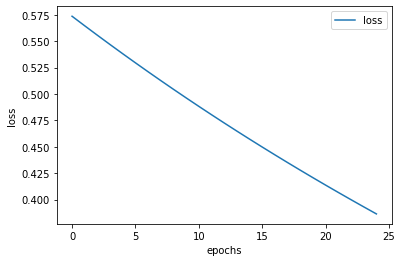

In [1348]:
# Plot history (also known as a loss curve)
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [1349]:
pred = model.predict([input, target])

1/1 [==============================] - 1s 597ms/step


In [1352]:
input[0][0]

array([ 0.333333,  0.017141,  0.227273,  0.12381 ,  0.877193, -0.995685,
        0.992237,  0.825397, -0.990674,  0.847189,  0.52381 ,  0.086207,
        0.473684,  0.909091], dtype=float32)

In [1353]:
numbers = [x[-1] for x in pred[0]]

In [1354]:

result = [0] * len(numbers)
for i, num in enumerate(sorted(numbers)):
    result[numbers.index(num)] = i

print(result)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [1355]:

dict_result = dict(zip(result, numbers))

In [1356]:
print('nth : ', 'value')
dict_result

nth :  value


{0: 0.11695391,
 1: 0.122236036,
 2: 0.12622987,
 3: 0.14348635,
 4: 0.1447901,
 5: 0.16562283,
 6: 0.18662673,
 7: 0.20484978,
 8: 0.22117615,
 9: 0.23972438}

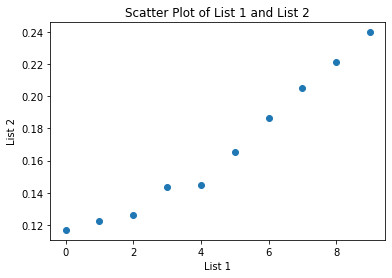

In [1359]:
import matplotlib.pyplot as plt


plt.scatter(result, numbers)
plt.xlabel("List 1")
plt.ylabel("List 2")
plt.title("Scatter Plot of List 1 and List 2")
plt.show()
